In [1]:
import matplotlib.pyplot as plt
import supy as sp
import pandas as pd
import numpy as np
from pathlib import Path
get_ipython().run_line_magic('matplotlib', 'inline')
%config InlineBackend.figure_format = 'svg'

In [2]:
path_runcontrol = Path('baserun')/ 'RunControl.nml'
df_state_init = sp.init_supy(path_runcontrol)
grid = df_state_init.index[0]
df_forcing = sp.load_forcing_grid(path_runcontrol, grid)

2020-06-15 15:54:01,467 - SuPy - INFO - All cache cleared.
2020-06-15 15:54:03,138 - SuPy - INFO - All cache cleared.


#### Three scenario utilised
1. Initial conditions used in sample data - Used Suffix: none
2. Building fraction = 0. grass = .41 - Population day/night = 0 - Used Suffix: _r         ("Rural" Conditions)
3. Building fraction = 0.01 grass = .40 - Population day/night = 0 - Used Suffix: _rb      ("Rural"conditons with Building)

In [3]:
df_state_r = df_state_init.copy()
df_state_r.loc[:, ('sfr', '(1,)')] = .00 #Building
df_state_r.loc[:, ('sfr', '(4,)')] = 0.41 #Grass
df_state_r.popdensdaytime = 0
df_state_r.popdensnighttime = 0 
grid_r = df_state_r.index[0]
sp.check_state(df_state_r)

df_state_rb = df_state_init.copy()
df_state_rb.loc[:, ('sfr', '(1,)')] = .01 #Building
df_state_rb.loc[:, ('sfr', '(4,)')] = 0.40 #Grass
df_state_rb.popdensdaytime = 0
df_state_rb.popdensnighttime = 0 
grid_rb = df_state_rb.index[0]
sp.check_state(df_state_rb)

2020-06-15 15:54:08,402 - SuPy - INFO - SuPy is validating `df_state`...
2020-06-15 15:54:08,574 - SuPy - INFO - All checks for `df_state` passed!
2020-06-15 15:54:08,574 - SuPy - INFO - SuPy is validating `df_state`...
2020-06-15 15:54:08,731 - SuPy - INFO - All checks for `df_state` passed!


In [4]:
# Run SuPy initaial conditions
df_output, df_state_final = sp.run_supy(df_forcing, df_state_init);
df_output_suews = df_output['SUEWS'];

# Run SuPy with modified environment add _r for recognition later on
df_r_output, df_state_r_final = sp.run_supy(df_forcing, df_state_r);
df_r_output_suews = df_r_output['SUEWS'];
df_r_output_suews = df_r_output_suews.add_suffix('_r');

# Run SuPy with modified environment add _rb for recognition later on
df_rb_output, df_state_rb_final = sp.run_supy(df_forcing, df_state_rb);
df_rb_output_suews = df_rb_output['SUEWS'];
df_rb_output_suews = df_rb_output_suews.add_suffix('_rb');

2020-06-15 15:54:10,777 - SuPy - INFO - ====================
2020-06-15 15:54:10,777 - SuPy - INFO - Simulation period:
2020-06-15 15:54:10,777 - SuPy - INFO -   Start: 2011-01-01 00:05:00
2020-06-15 15:54:10,777 - SuPy - INFO -   End: 2013-01-01 00:00:00
2020-06-15 15:54:10,777 - SuPy - INFO - 
2020-06-15 15:54:10,777 - SuPy - INFO - No. of grids: 1
2020-06-15 15:54:10,777 - SuPy - INFO - SuPy is running in serial mode
2020-06-15 15:55:05,184 - SuPy - INFO - Execution time: 54.4 s
2020-06-15 15:55:05,184 - SuPy - INFO - ====================

2020-06-15 15:55:05,184 - SuPy - INFO - ====================
2020-06-15 15:55:05,184 - SuPy - INFO - Simulation period:
2020-06-15 15:55:05,184 - SuPy - INFO -   Start: 2011-01-01 00:05:00
2020-06-15 15:55:05,184 - SuPy - INFO -   End: 2013-01-01 00:00:00
2020-06-15 15:55:05,184 - SuPy - INFO - 
2020-06-15 15:55:05,184 - SuPy - INFO - No. of grids: 1
2020-06-15 15:55:05,184 - SuPy - INFO - SuPy is running in serial mode
2020-06-15 15:56:48,314 - S

In [93]:
df_output_solweig = df_output['SOLWEIG']
df_output_solweig_g = df_output_solweig.loc[grid]
df_merge_s = pd.concat([df_output_solweig_g],axis=1,join='inner')
df_output_rsl = df_output['RSL']
df_output_rsl_g = df_output_rsl.loc[grid]

In [138]:
# Merge to one dataframe for easier plotting
grid_r = df_state_r.index[0];
df_output_suews_g = df_output_suews.loc[grid];
df_r_output_suews_g = df_r_output_suews.loc[grid_r];
df_rb_output_suews_g = df_rb_output_suews.loc[grid_rb];
df_merge = pd.concat([df_output_suews_g, df_r_output_suews_g,df_rb_output_suews_g],axis=1,join='inner');
df_rsl = pd.concat([df_output_rsl_g],axis=1,join='inner');


##### Radiation fluxes 22 July - 24 July 2012

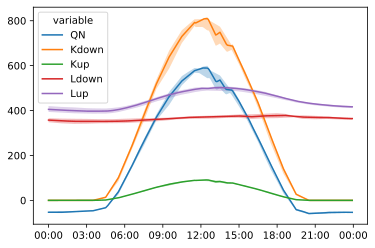

In [137]:
s = '2012 7 22';
e = '2012 7 25' ;  
sp.util.plot_day_clm(df_merge.loc[s:e,['QN', 'Kdown', 'Kup', 'Ldown', 'Lup']]);

##### Sunrise and Sundown
SOLWEIG variables

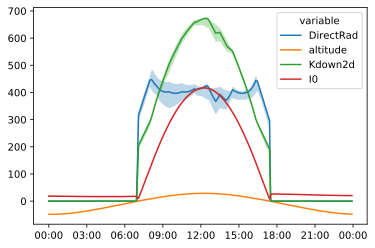

In [41]:
sp.util.plot_day_clm(df_merge_s.loc[s:e,['DirectRad','altitude','Kdown2d','I0']]);

##### Wind

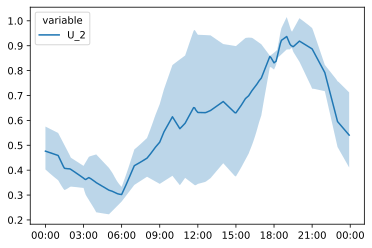

In [42]:
sp.util.plot_day_clm(df_output_rsl.loc[s:e,['U_2']]);

##### Temperature 2 magl

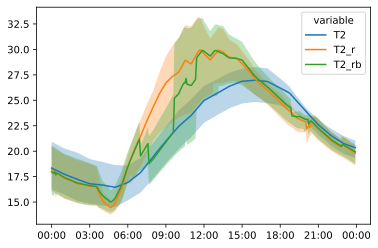

In [69]:
sp.util.plot_day_clm(df_merge.loc[s:e,['T2', 'T2_r', 'T2_rb']]);

##### Relative Humidity (%)

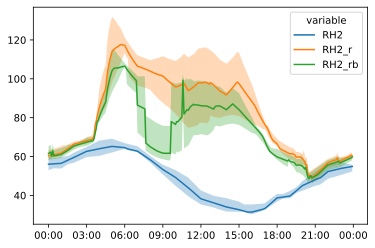

In [44]:
sp.util.plot_day_clm(df_merge.loc[s:e,['RH2', 'RH2_r', 'RH2_rb']]);

##### Specific Humidity (g/kg^-1)

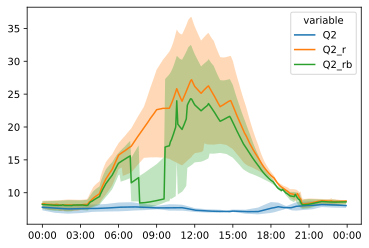

In [45]:
sp.util.plot_day_clm(df_merge.loc[s:e,['Q2', 'Q2_r', 'Q2_rb']]);

##### Friction Velocity

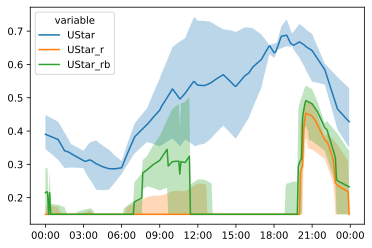

In [46]:
sp.util.plot_day_clm(df_merge.loc[s:e,['UStar', 'UStar_r', 'UStar_rb']]);

##### Resistance

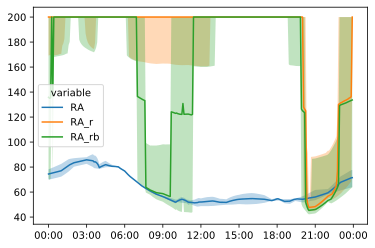

In [47]:
sp.util.plot_day_clm(df_merge.loc[s:e,['RA', 'RA_r', 'RA_rb']]);

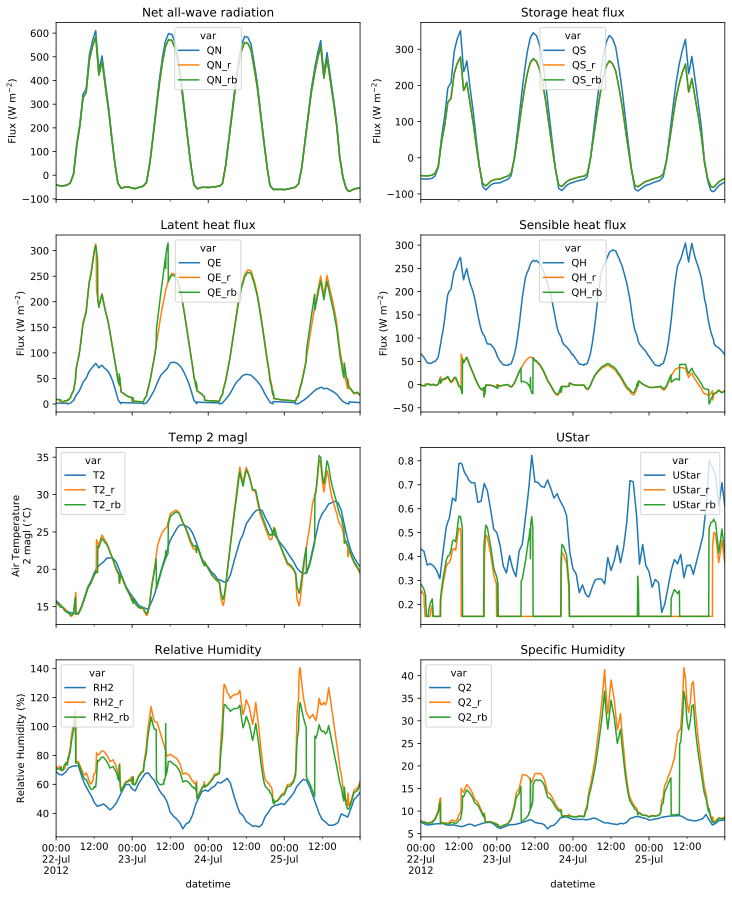

In [68]:
size = (12,15)
fig, axes = plt.subplots(4, 2, sharex=True)

# QN
df_merge.loc[s : e ,['QN','QN_r','QN_rb']].plot(ax=axes[0,0],figsize=size,title='Net all-wave radiation',
    )
# QS
df_merge.loc[s : e ,['QS','QS_r','QS_rb']].plot(ax=axes[0,1],figsize=size,title='Storage heat flux',
    )
# QE
df_merge.loc[s : e ,['QE','QE_r','QE_rb']].plot(ax=axes[1,0],figsize=size,title='Latent heat flux',
    )
# QH
df_merge.loc[s : e ,['QH','QH_r','QH_rb']].plot(ax=axes[1,1],figsize=size,title='Sensible heat flux',
    )
# T2
df_merge.loc[s : e ,['T2','T2_r','T2_rb']].plot(ax=axes[2,0],figsize=size,title='Temp 2 magl',
    )
# Friction Velocity
df_merge.loc[s : e ,['UStar','UStar_r','UStar_rb']].plot(ax=axes[2,1],figsize=size,title='UStar',
    )
# RH
df_merge.loc[s : e ,['RH2','RH2_r','RH2_rb']].plot(ax=axes[3,0],figsize=size,title='Relative Humidity',
    )
# RH
df_merge.loc[s : e ,['Q2','Q2_r','Q2_rb']].plot(ax=axes[3,1],figsize=size,title='Specific Humidity',
    )
axes[0,0].set_ylabel('Flux ($ \mathrm{W \ m^{-2}}$)')
axes[1,0].set_ylabel('Flux ($ \mathrm{W \ m^{-2}}$)')
axes[1,1].set_ylabel('Flux ($ \mathrm{W \ m^{-2}}$)')
axes[0,1].set_ylabel('Flux ($ \mathrm{W \ m^{-2}}$)')
axes[2,0].set_ylabel('Air Temperature\n2 magl ($^{\\circ}}$C)')
axes[3,0].set_ylabel('Relative Humidity (%)');

# Test RSL-Plot

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x144f1aa0828>)

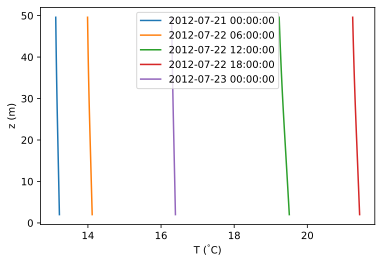

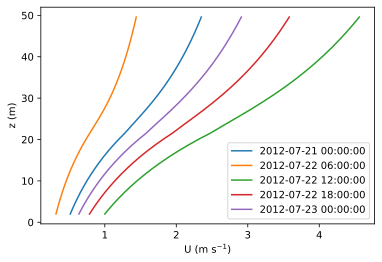

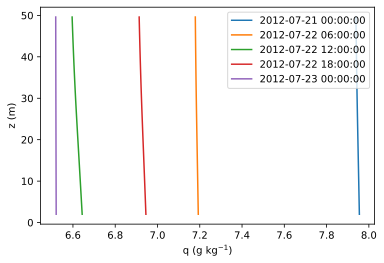

In [223]:
t0 = df_output_rsl_g.loc['2012 07 21 00:00' : '2012 07 21 00:00']
t6 = df_output_rsl_g.loc['2012 07 22 06:00' : '2012 07 22 06:00']
t12 = df_output_rsl_g.loc['2012 07 22 12:00' : '2012 07 22 12:00']
t18 = df_output_rsl_g.loc['2012 07 22 18:00' : '2012 07 22 18:00']
t24 = df_output_rsl_g.loc['2012 07 23 00:00' : '2012 07 23 00:00']
#sp.util.plot_rsl(df_output_rsl.loc['2012-07-22 00:00'])
#df_output_rsl.loc['2012-07-22 12:00', ['T_2']]
df_rsl = pd.concat([t0,t6,t12,t18,t24],join='inner');

sp.util.plot_rsl(df_rsl,'T')
sp.util.plot_rsl(df_rsl,'U')
sp.util.plot_rsl(df_rsl,'q')

var,z_1,z_2,z_3,z_4,z_5,z_6,z_7,z_8,z_9,z_10,...,q_21,q_22,q_23,q_24,q_25,q_26,q_27,q_28,q_29,q_30
datetime,,,,,,,,,,,,,,,,,,,,,
2011-01-01 00:05:00,2.0,2.786667,4.18,5.573333,6.966667,8.36,10.0,11.146667,12.54,13.933333,...,3.792550,3.792374,3.792203,3.792038,3.791879,3.791726,3.791578,3.791435,3.791297,3.791163
2011-01-01 00:10:00,2.0,2.786667,4.18,5.573333,6.966667,8.36,10.0,11.146667,12.54,13.933333,...,3.785658,3.786354,3.787028,3.787680,3.788311,3.788921,3.789510,3.790080,3.790631,3.791163
2011-01-01 00:15:00,2.0,2.786667,4.18,5.573333,6.966667,8.36,10.0,11.146667,12.54,13.933333,...,3.785238,3.785987,3.786712,3.787413,3.788092,3.788748,3.789382,3.789996,3.790589,3.791163
2011-01-01 00:20:00,2.0,2.786667,4.18,5.573333,6.966667,8.36,10.0,11.146667,12.54,13.933333,...,3.784564,3.785399,3.786207,3.786988,3.787744,3.788475,3.789181,3.789864,3.790525,3.791163
2011-01-01 00:25:00,2.0,2.786667,4.18,5.573333,6.966667,8.36,10.0,11.146667,12.54,13.933333,...,3.783756,3.784694,3.785601,3.786479,3.787327,3.788147,3.788940,3.789706,3.790447,3.791163
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-31 23:40:00,2.0,2.786667,4.18,5.573333,6.966667,8.36,10.0,11.146667,12.54,13.933333,...,6.483529,6.483024,6.482535,6.482062,6.481604,6.481161,6.480734,6.480320,6.479920,6.479532
2012-12-31 23:45:00,2.0,2.786667,4.18,5.573333,6.966667,8.36,10.0,11.146667,12.54,13.933333,...,6.483561,6.483052,6.482559,6.482082,6.481620,6.481174,6.480743,6.480326,6.479923,6.479532
2012-12-31 23:50:00,2.0,2.786667,4.18,5.573333,6.966667,8.36,10.0,11.146667,12.54,13.933333,...,6.483596,6.483082,6.482585,6.482103,6.481638,6.481188,6.480753,6.480333,6.479926,6.479532


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 210528 entries, 2011-01-01 00:05:00 to 2013-01-01 00:00:00
Freq: 300S
Columns: 120 entries, z_1 to q_30
dtypes: float64(120)
memory usage: 204.4 MB


AttributeError: 'Series' object has no attribute 'columns'